# Automated Trading – Money Management Case Study

## Introduction

In this project, we developed an automated trading system with a strong focus on *Money Management*. Chapter 3, presented in this repository, illustrates a practical case study of risk management and optimal capital allocation within a trading system.

The primary objective of this system is to determine the optimal fraction of capital to invest in each trade based on risk management parameters such as position sizing, risk level, and market volatility.

---

## Continuous-Time Simulation of the Kelly Criterion

### **1. Introduction**

In this chapter, we introduce the **continuous-time Kelly criterion** and its applications in financial markets. To simplify the simulation, the chapter is structured into four sections: an **introduction to the continuous-time Kelly criterion**, an **application using the EUR/USD asset**, and finally a **discussion of limitations and deeper analysis**.

This section focuses on the key aspects of the continuous-time Kelly criterion, with the objective of understanding and applying it in trading and investment contexts. The Kelly criterion maximizes the expected logarithmic growth of wealth on a period-by-period basis and can be applied to any scenario where there is a measurable probability of return or gain for a given investment or bet.

> *“The Kelly criterion maximizes the expected value of the logarithm of wealth period by period. It can be applied in any situation where there exists a probability of return or gain for a given investment or bet.”*

---

### Kelly Formula

The Kelly formula is defined as:

**f = (b × p − q) / b**

Where:

* **f**: Optimal fraction of capital to risk
* **b**: Win/loss ratio (expected gain divided by potential loss)
* **p**: Probability of winning
* **q**: Probability of losing, where **q = 1 − p**

---

### Possible Outcomes of the Kelly Fraction

1. **Positive Kelly Fraction**
   Indicates that the strategy recommends allocating a portion of available capital to each trade. This suggests long-term capital growth potential when the strategy is applied correctly.

2. **Negative Kelly Fraction**
   Implies that the strategy advises against investing or using leverage. This occurs when the probability of gains is insufficient relative to expected losses, signaling a high risk of capital erosion.

3. **Zero Kelly Fraction**
   Indicates that the Kelly criterion does not recommend any investment. This may occur when available data does not allow for a meaningful Kelly calculation or when market conditions do not justify capital allocation.

---

### Fraction of Capital to Risk

The Kelly criterion recommends risking a **fraction of the available capital**, rather than a fixed dollar amount.
This approach dynamically adjusts position size according to the total portfolio value, ensuring better risk control and scalability.

## **2. Assumptions**

For the sake of simplicity, we make the following assumptions:

### **1. A Perfect Market Environment (No Transaction Costs)**

First, we assume a perfect market with **no commissions, transaction fees, or taxes**.

This assumption implies that there are no costs associated with financial transactions, such as brokerage fees or capital gains taxes. As a result, the analysis focuses solely on the **gross investment outcomes**, without considering deductions that would reduce real-world returns. While this simplifies the calculations and allows for a more direct comparison of investment strategies, it may lead to **overly optimistic return estimates** when applied to real market conditions.

---

### **2. No Short Selling**

Second, we assume that **short selling is not allowed**.

This assumption restricts investors from exploiting potential profit opportunities in declining markets. Short selling involves selling an asset that is not currently owned, with the expectation of repurchasing it later at a lower price. It is commonly used to benefit from bearish market conditions or to hedge existing positions.

---

### **3. No Market Impact of Trades**

Third, we assume that **our trades do not influence market prices**.

This assumption implies that individual transactions are sufficiently small and therefore have no impact on market prices. By neglecting market impact, we assume that prices remain unaffected by our trading activity, which simplifies the analysis and allows us to focus exclusively on the performance of the trading strategy itself.


## **3. Library Identification**

Before starting the simulation, it is essential to identify the libraries that will be used in our analysis.

* **pandas** (imported as **pd**)

Pandas is a Python library designed for data manipulation and analysis. It provides powerful data structures such as DataFrames, which are particularly useful for handling time series, financial data, and performing statistical analysis.

* **matplotlib.pyplot** (imported as **plt**)

Matplotlib is a Python library used for creating static, dynamic, and interactive visualizations. It allows us to plot price movements, performance metrics, and results derived from the simulation.

* **MetaTrader5** (imported as **mt5**)

MetaTrader 5 (MT5) is a multi-asset trading platform developed by MetaQuotes Software. It enables traders and developers to access and trade various financial markets, including forex, futures, stocks, and indices. In this project, MT5 is used to retrieve historical market data required for the simulation.


In [1]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

## 2-Eurusd & US500cash



### **2.1. Data Used**

#### *Historical Data Exploration*

This approach provides a solid foundation for evaluating the effectiveness of the Kelly criterion and for comparing its results with a daily investment strategy.

---

### **2.1.1. EUR/USD**

EUR/USD represents the exchange rate between the euro (EUR) and the US dollar (USD), indicating how many US dollars are required to purchase one euro. It is one of the most actively traded currency pairs in the foreign exchange (Forex) market and is influenced by a wide range of economic, political, and financial factors.


In [10]:
# Connection to MetaTrader 5
if not mt5.initialize():
    print("MetaTrader 5 could not be started")
    mt5.shutdown()

# Define the symbol and timeframe
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_D1  # Daily data

# Define the date range
start_date = datetime(2020, 9, 10)
end_date = datetime(2024, 6, 29)

# Download historical data for the specified date range
rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)

# Convert to a Pandas DataFrame
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')

# Display the first rows of the data
print(data)

# Save the data to a CSV file
data.to_csv('data_analyzed1.csv', index=False)

          time     open     high      low    close  tick_volume  spread  \
0   2020-09-10  1.18026  1.19174  1.17994  1.18146        60593       1   
1   2020-09-11  1.18145  1.18739  1.18086  1.18459        46151       1   
2   2020-09-14  1.18362  1.18880  1.18321  1.18643        37436       1   
3   2020-09-15  1.18648  1.19004  1.18393  1.18462        38904       1   
4   2020-09-16  1.18465  1.18826  1.17873  1.18155        53041       1   
..         ...      ...      ...      ...      ...          ...     ...   
984 2024-06-24  1.06850  1.07464  1.06835  1.07313        32499       0   
985 2024-06-25  1.07314  1.07442  1.06908  1.07132        30817       0   
986 2024-06-26  1.07116  1.07179  1.06659  1.06797        33720       0   
987 2024-06-27  1.06787  1.07264  1.06740  1.07032        34481       0   
988 2024-06-28  1.06999  1.07248  1.06853  1.07116        38432       0   

     real_volume  
0              0  
1              0  
2              0  
3              0  
4   

### **2.1.2. Data Structure**

The data is stored in a **DataFrame** structure, obtained using the Python **Pandas** library. We used **MetaTrader 5 (mt5)** to extract historical price data for the EUR/USD currency pair with a **daily frequency (1 day)**, totaling **1000 entries**.

The extracted columns include time, open, high, low, close prices, tick volume, spread, and real volume.

---

#### **Data Description**

Here is a description of the extracted columns:

* **time**: The date of each observation, initially represented as an integer (`int64`).
* **open**: Opening price for the day, represented as a floating-point number (`float64`).
* **high**: Highest price during the daily period, represented as a floating-point number (`float64`).
* **low**: Lowest price during the daily period, represented as a floating-point number (`float64`).
* **close**: Daily closing price, represented as a floating-point number (`float64`).
* **tick_volume**: Tick volume for each day, represented as an unsigned 64-bit integer (`uint64`).
* **spread**: Difference between the bid and ask prices for the day, represented as a 32-bit integer (`int32`).
* **real_volume**: Actual traded volume for each day, represented as an unsigned 64-bit integer (`uint64`).


**Dataset Cleaning and Scaling**

By retaining only the OHLC columns (Open, High, Low, Close) and applying Min-Max scaling, we simplify our dataset and ensure it is ready for effective technical analysis and optimal application of machine learning models.

In [11]:
# Extract only the OHLC columns
data = data[['time', 'open', 'high', 'low', 'close']]
data_ohlc = data[['open', 'high', 'low', 'close']]

# Apply Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_ohlc)
scaled_data = pd.DataFrame(scaled_data, index=data_ohlc.index, columns=data_ohlc.columns)

# Display the original OHLC data
print(data)


          time     open     high      low    close
0   2020-09-10  1.18026  1.19174  1.17994  1.18146
1   2020-09-11  1.18145  1.18739  1.18086  1.18459
2   2020-09-14  1.18362  1.18880  1.18321  1.18643
3   2020-09-15  1.18648  1.19004  1.18393  1.18462
4   2020-09-16  1.18465  1.18826  1.17873  1.18155
..         ...      ...      ...      ...      ...
984 2024-06-24  1.06850  1.07464  1.06835  1.07313
985 2024-06-25  1.07314  1.07442  1.06908  1.07132
986 2024-06-26  1.07116  1.07179  1.06659  1.06797
987 2024-06-27  1.06787  1.07264  1.06740  1.07032
988 2024-06-28  1.06999  1.07248  1.06853  1.07116

[989 rows x 5 columns]


Row 1000: win_prob=0.43, avg_win=0.0024, avg_loss=0.0027, win_loss_ratio=0.89, kelly_fraction=-0.2054
Current Kelly Fraction value: -0.20541451397732402
Kelly Fraction is negative. Investing is not recommended. Leverage should be 0.


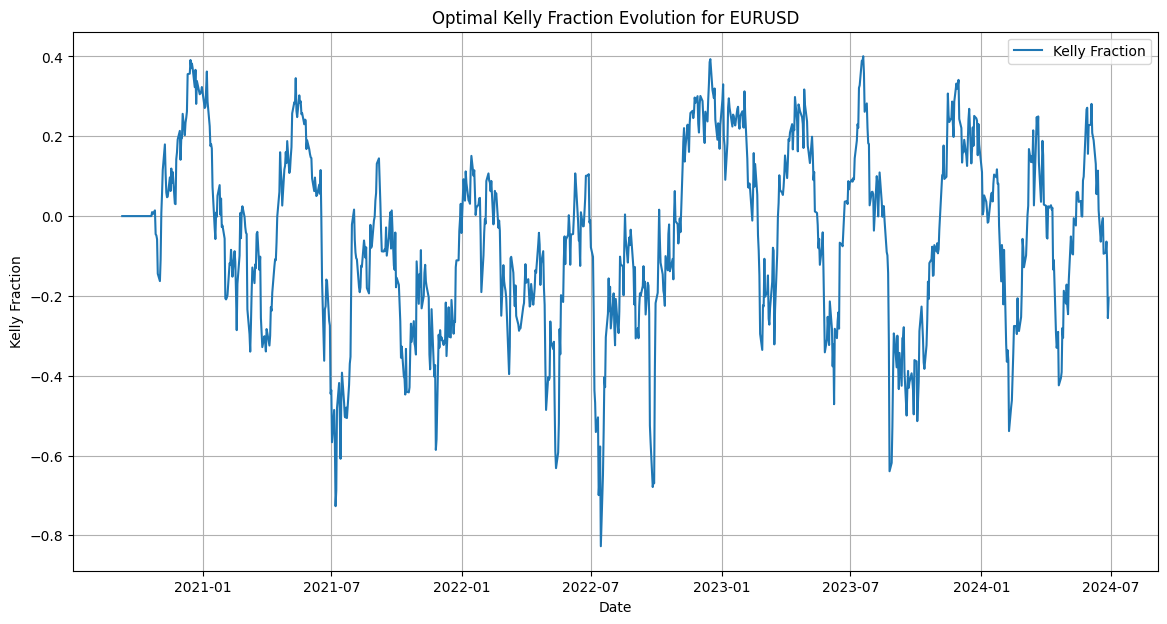

          time     open     high      low    close    Return  Kelly Fraction
0   2020-09-10  1.18026  1.19174  1.17994  1.18146       NaN        0.000000
1   2020-09-11  1.18145  1.18739  1.18086  1.18459  0.002649        0.000000
2   2020-09-14  1.18362  1.18880  1.18321  1.18643  0.001553        0.000000
3   2020-09-15  1.18648  1.19004  1.18393  1.18462 -0.001526        0.000000
4   2020-09-16  1.18465  1.18826  1.17873  1.18155 -0.002592        0.000000
..         ...      ...      ...      ...      ...       ...             ...
984 2024-06-24  1.06850  1.07464  1.06835  1.07313  0.003723       -0.091331
985 2024-06-25  1.07314  1.07442  1.06908  1.07132 -0.001687       -0.063870
986 2024-06-26  1.07116  1.07179  1.06659  1.06797 -0.003127       -0.117204
987 2024-06-27  1.06787  1.07264  1.06740  1.07032  0.002200       -0.255580
988 2024-06-28  1.06999  1.07248  1.06853  1.07116  0.000785       -0.205415

[989 rows x 7 columns]


True

In [12]:
# Calculate returns
data['Return'] = data['close'].pct_change()

# Function to calculate Kelly Fraction
def calculate_kelly_fraction(win_prob, win_loss_ratio):
    return (win_prob * (win_loss_ratio + 1) - 1) / win_loss_ratio

# Initialize Kelly parameters
rolling_window = 30  # Time window for probability calculation
kelly_fractions = []

for i in range(len(data)):
    if i < rolling_window:
        kelly_fractions.append(0)  # Not enough data to calculate
    else:
        window_data = data.iloc[i - rolling_window:i]
        wins = window_data[window_data['Return'] > 0]
        losses = window_data[window_data['Return'] <= 0]
        win_prob = len(wins) / rolling_window
        avg_win = wins['Return'].mean() if len(wins) > 0 else 0
        avg_loss = abs(losses['Return'].mean()) if len(losses) > 0 else 0
        win_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0
        kelly_fraction = calculate_kelly_fraction(win_prob, win_loss_ratio) if win_loss_ratio > 0 else 0
        kelly_fractions.append(kelly_fraction)

# Display Kelly parameters
print(f"Row {1000}: win_prob={win_prob:.2f}, avg_win={avg_win:.4f}, avg_loss={avg_loss:.4f}, win_loss_ratio={win_loss_ratio:.2f}, kelly_fraction={kelly_fraction:.4f}")

data['Kelly Fraction'] = kelly_fractions

# Current Kelly Fraction value
current_kelly_value = data['Kelly Fraction'].iloc[-1]
print(f"Current Kelly Fraction value: {current_kelly_value}")

# Check Kelly Fraction for leverage
if current_kelly_value < 0:
    print("Kelly Fraction is negative. Investing is not recommended. Leverage should be 0.")
else:
    # Calculate recommended leverage if Kelly Fraction is positive (optional)
    recommended_leverage = current_kelly_value  # You can adjust this value based on your criteria
    print(f"Kelly Fraction is positive. Recommended leverage is {recommended_leverage}.")

# Save data to CSV
data.to_csv('data_analyzed1.csv', index=False)

# Plot Kelly Fraction evolution
plt.figure(figsize=(14, 7))
plt.plot(data['time'], data['Kelly Fraction'], label='Kelly Fraction')
plt.xlabel('Date')
plt.ylabel('Kelly Fraction')
plt.title('Optimal Kelly Fraction Evolution for EURUSD')
plt.legend()
plt.grid(True)
plt.show()

print(data)

# Disconnect from MetaTrader 5
mt5.shutdown()


Based on the analysis of the chart *“Optimal Kelly Fraction Evolution for EUR/USD”*, the Kelly value for the EUR/USD pair is **negative**, indicating that investing in this pair is **not recommended**. This suggests that applying any investment strategy could potentially result in **losses**.

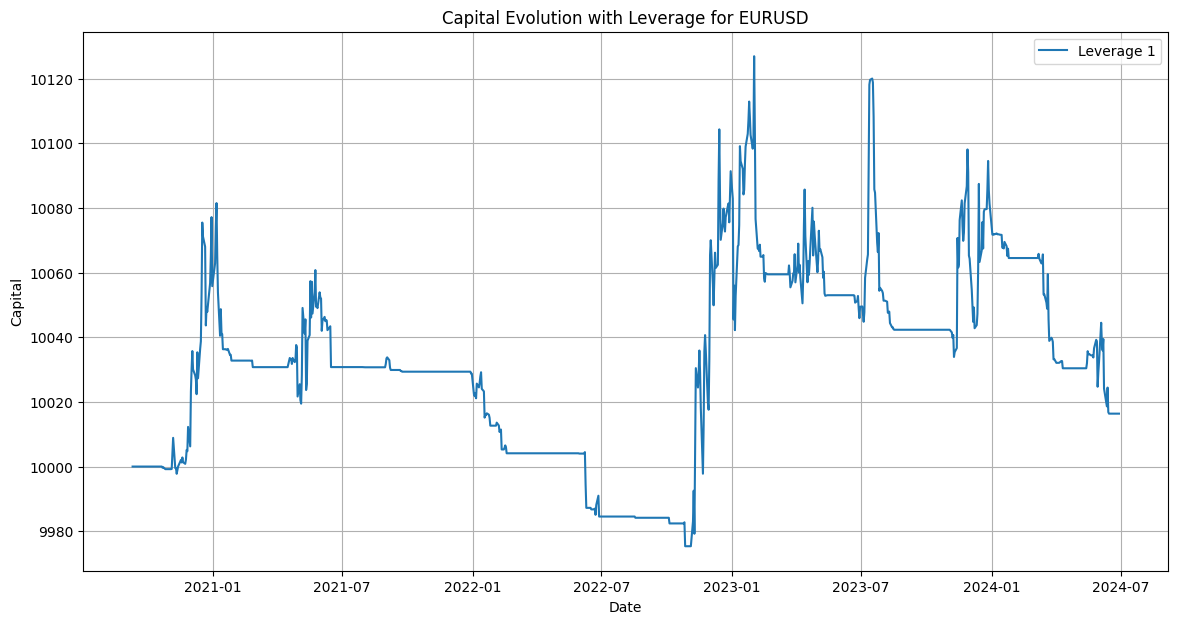

In [13]:
# Reload previously analyzed data
data = pd.read_csv('data_analyzed1.csv') 

# Initialize capital
initial_capital = 10000

# Leverage level to apply
leverage = 1  # Manually change this value to test different leverage levels
results = []

# Trading simulation with the specified leverage level
capital_kelly = initial_capital
capital_kelly_values = [capital_kelly]
for i in range(1, len(data)):
    trade_return = data['Return'].iloc[i]
    kelly_fraction = data['Kelly Fraction'].iloc[i]
    if kelly_fraction > 0:  # Do not invest if Kelly Fraction is negative or zero
        trade_kelly = trade_return * kelly_fraction * leverage
        capital_kelly *= (1 + trade_kelly)
    capital_kelly_values.append(capital_kelly)
results = capital_kelly_values

# Convert 'time' column to datetime format if needed
data['time'] = pd.to_datetime(data['time'])

# Plot capital evolution with the specified leverage
plt.figure(figsize=(14, 7))
plt.plot(data['time'], results, label=f'Leverage {leverage}')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Capital Evolution with Leverage for EURUSD')
plt.legend()
plt.grid(True)
plt.show()


In the graphical analysis of *“Capital Evolution with Leverage for EUR/USD”*, a noticeable decline indicates a substantial reduction in invested funds. This decrease is generally interpreted as a **significant loss of capital**.


### **2.2 US500Cash**

The **US500Cash**, or **S&P 500**, is a stock market index that tracks the performance of the **500 largest publicly traded companies in the United States**. It serves as a key indicator of the **overall health of the U.S. economy** and is influenced by corporate earnings, economic conditions, and global events.


In [14]:
# Connection to MetaTrader 5
if not mt5.initialize():
    print("MetaTrader 5 could not be started")
    mt5.shutdown()

# Define the symbol and timeframe
symbol = "US500"
timeframe = mt5.TIMEFRAME_D1  # Daily data

# Define the date range
start_date = datetime(2020, 8, 18)
end_date = datetime(2024, 6, 29)

# Download historical data for the specified date range
rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)

# Convert to a Pandas DataFrame
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')

# Display the first rows of the data
print(data)

# Save the data to a CSV file
data.to_csv('data_analyzed2.csv', index=False)


          time     open     high      low    close  tick_volume  spread  \
0   2020-08-18  3382.80  3395.00  3370.00  3392.70        25154      40   
1   2020-08-19  3392.90  3399.40  3369.20  3373.00        26972      40   
2   2020-08-20  3372.10  3391.10  3348.40  3387.20        32746      40   
3   2020-08-21  3388.00  3400.20  3360.50  3396.30        34405      40   
4   2020-08-24  3400.10  3432.70  3398.20  3430.10        28589      40   
..         ...      ...      ...      ...      ...          ...     ...   
994 2024-06-24  5473.39  5493.72  5445.64  5451.14        33670      20   
995 2024-06-25  5452.58  5475.83  5447.61  5471.33        27260      20   
996 2024-06-26  5471.45  5489.04  5453.84  5470.76        29294      20   
997 2024-06-27  5470.88  5492.70  5454.12  5487.37        29260      20   
998 2024-06-28  5487.37  5523.21  5449.21  5461.88        33781      20   

     real_volume  
0              0  
1              0  
2              0  
3              0  
4   

### **2.2.1 Data Structure for US500Cash**

The data is stored in a **DataFrame** structure, obtained using the Python **Pandas** library. We used **MetaTrader 5 (mt5)** to extract historical price data for the **US500Cash index** with a **daily frequency (1 day)**, totaling **1000 entries**.

The extracted columns include time, open, high, low, close prices, tick volume, spread, and real volume.

---

#### **Data Description**

Here is a description of the extracted columns:

* **time**: The date of each observation, initially represented as an integer (`int64`).
* **open**: Opening price for the day, represented as a floating-point number (`float64`).
* **high**: Highest price during the daily period, represented as a floating-point number (`float64`).
* **low**: Lowest price during the daily period, represented as a floating-point number (`float64`).
* **close**: Daily closing price, represented as a floating-point number (`float64`).
* **tick_volume**: Tick volume for each day, represented as an unsigned 64-bit integer (`uint64`).
* **spread**: Difference between bid and ask prices for the day, represented as a 32-bit integer (`int32`).
* **real_volume**: Actual traded volume for each day, represented as an unsigned 64-bit integer (`uint64`).


**Prétraitement**

In [15]:
# Extract only the OHLC columns
data = data[['time', 'open', 'high', 'low', 'close']]
data_ohlc = data[['open', 'high', 'low', 'close']]

# Apply Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_ohlc)
scaled_data = pd.DataFrame(scaled_data, index=data_ohlc.index, columns=data_ohlc.columns)

# Display the original OHLC data
print(data)


          time     open     high      low    close
0   2020-08-18  3382.80  3395.00  3370.00  3392.70
1   2020-08-19  3392.90  3399.40  3369.20  3373.00
2   2020-08-20  3372.10  3391.10  3348.40  3387.20
3   2020-08-21  3388.00  3400.20  3360.50  3396.30
4   2020-08-24  3400.10  3432.70  3398.20  3430.10
..         ...      ...      ...      ...      ...
994 2024-06-24  5473.39  5493.72  5445.64  5451.14
995 2024-06-25  5452.58  5475.83  5447.61  5471.33
996 2024-06-26  5471.45  5489.04  5453.84  5470.76
997 2024-06-27  5470.88  5492.70  5454.12  5487.37
998 2024-06-28  5487.37  5523.21  5449.21  5461.88

[999 rows x 5 columns]


Row 1000: win_prob=0.60, avg_win=0.0040, avg_loss=0.0030, win_loss_ratio=1.35, kelly_fraction=0.3028
Current Kelly Fraction value: 0.30275989387592905
Kelly Fraction is positive. Recommended leverage is 0.30275989387592905.


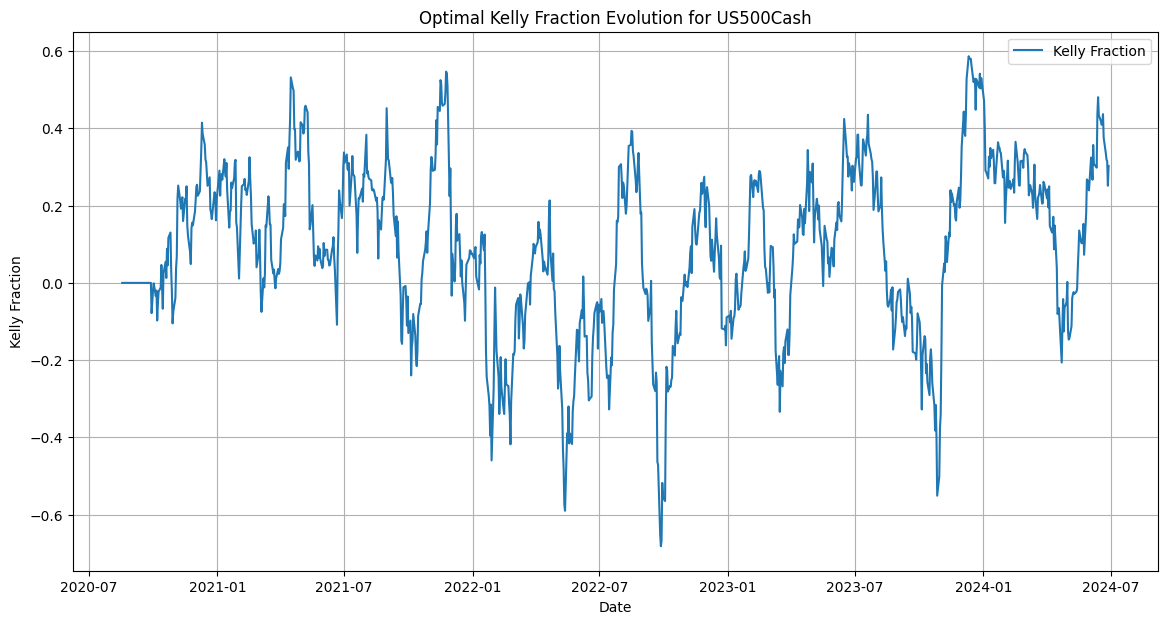

          time     open     high      low    close    Return  Kelly Fraction
0   2020-08-18  3382.80  3395.00  3370.00  3392.70       NaN        0.000000
1   2020-08-19  3392.90  3399.40  3369.20  3373.00 -0.005807        0.000000
2   2020-08-20  3372.10  3391.10  3348.40  3387.20  0.004210        0.000000
3   2020-08-21  3388.00  3400.20  3360.50  3396.30  0.002687        0.000000
4   2020-08-24  3400.10  3432.70  3398.20  3430.10  0.009952        0.000000
..         ...      ...      ...      ...      ...       ...             ...
994 2024-06-24  5473.39  5493.72  5445.64  5451.14 -0.002250        0.336232
995 2024-06-25  5452.58  5475.83  5447.61  5471.33  0.003704        0.319798
996 2024-06-26  5471.45  5489.04  5453.84  5470.76 -0.000104        0.315146
997 2024-06-27  5470.88  5492.70  5454.12  5487.37  0.003036        0.251546
998 2024-06-28  5487.37  5523.21  5449.21  5461.88 -0.004645        0.302760

[999 rows x 7 columns]


In [16]:
# Calculate returns
data['Return'] = data['close'].pct_change()

# Function to calculate Kelly Fraction
def calculate_kelly_fraction(win_prob, win_loss_ratio):
    return (win_prob * (win_loss_ratio + 1) - 1) / win_loss_ratio

# Initialize Kelly parameters
rolling_window = 30  # Time window for probability calculation
kelly_fractions = []

for i in range(len(data)):
    if i < rolling_window:
        kelly_fractions.append(0)  # Not enough data to calculate
    else:
        window_data = data.iloc[i - rolling_window:i]
        wins = window_data[window_data['Return'] > 0]
        losses = window_data[window_data['Return'] <= 0]
        win_prob = len(wins) / rolling_window
        avg_win = wins['Return'].mean() if len(wins) > 0 else 0
        avg_loss = abs(losses['Return'].mean()) if len(losses) > 0 else 0
        win_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0
        kelly_fraction = calculate_kelly_fraction(win_prob, win_loss_ratio) if win_loss_ratio > 0 else 0
        kelly_fractions.append(kelly_fraction)

# Display Kelly parameters
print(f"Row {1000}: win_prob={win_prob:.2f}, avg_win={avg_win:.4f}, avg_loss={avg_loss:.4f}, win_loss_ratio={win_loss_ratio:.2f}, kelly_fraction={kelly_fraction:.4f}")

data['Kelly Fraction'] = kelly_fractions

# Current Kelly Fraction value
current_kelly_value = data['Kelly Fraction'].iloc[-1]
print(f"Current Kelly Fraction value: {current_kelly_value}")

# Check Kelly Fraction for leverage
if current_kelly_value < 0:
    print("Kelly Fraction is negative. Investing is not recommended. Leverage should be 0.")
else:
    # Calculate recommended leverage if Kelly Fraction is positive (optional)
    recommended_leverage = current_kelly_value  # You can adjust this value based on your criteria
    print(f"Kelly Fraction is positive. Recommended leverage is {recommended_leverage}.")

# Save data to CSV
data.to_csv('data_analyzed2.csv', index=False)

# Plot Kelly Fraction evolution
plt.figure(figsize=(14, 7))
plt.plot(data['time'], data['Kelly Fraction'], label='Kelly Fraction')
plt.xlabel('Date')
plt.ylabel('Kelly Fraction')
plt.title('Optimal Kelly Fraction Evolution for US500Cash')
plt.legend()
plt.grid(True)
plt.show()

# Disconnect from MetaTrader 5
mt5.shutdown()

# Display the full DataFrame
print(data)


Based on the analysis of the chart *“Optimal Kelly Fraction Evolution for US500Cash”*, the Kelly value for the US500Cash index is **positive**, indicating that investing in this index is **recommended**. This suggests that applying an investment strategy could potentially result in **gains**.


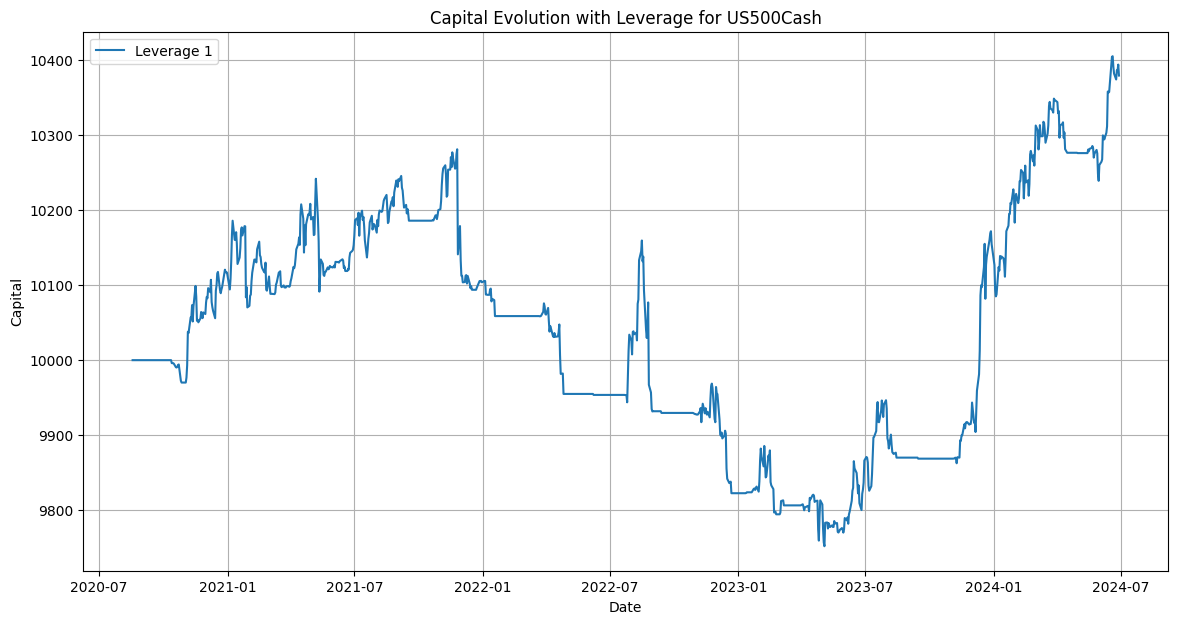

In [17]:
# Reload previously analyzed data
data = pd.read_csv('data_analyzed2.csv') 

# Initialize capital
initial_capital = 10000

# Leverage level to apply
leverage = 1  # Manually change this value to test different leverage levels
results = []

# Trading simulation with the specified leverage level
capital_kelly = initial_capital
capital_kelly_values = [capital_kelly]
for i in range(1, len(data)):
    trade_return = data['Return'].iloc[i]
    kelly_fraction = data['Kelly Fraction'].iloc[i]
    if kelly_fraction > 0:  # Do not invest if Kelly Fraction is negative or zero
        trade_kelly = trade_return * kelly_fraction * leverage
        capital_kelly *= (1 + trade_kelly)
    capital_kelly_values.append(capital_kelly)
results = capital_kelly_values

# Convert 'time' column to datetime format if needed
data['time'] = pd.to_datetime(data['time'])

# Plot capital evolution with the specified leverage
plt.figure(figsize=(14, 7))
plt.plot(data['time'], results, label=f'Leverage {leverage}')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Capital Evolution with Leverage for US500Cash')
plt.legend()
plt.grid(True)
plt.show()


The graphical analysis of *“Capital Evolution with Leverage for US500Cash”* shows a significant increase in invested funds. This rise is generally interpreted as a **substantial gain in capital**.


## **Discussion of Issues and Further Analysis**

### **EUR/USD**

1. **Effective Risk Detection**
   Simulations show that for the EUR/USD pair, the Kelly criterion value is **negative**. This indicates that, according to the Kelly criterion, it is **not optimal to risk any portion of capital** on this investment. This effective risk detection helps avoid potential losses in a market where the probability of gain is insufficient to justify the investment.

2. **Non-Investment Recommendation**
   A negative Kelly value suggests that the strategy recommends **not allocating capital** to this asset. This occurs when the probability of gains is too low relative to expected losses, indicating a **high risk of capital erosion**.

---

### **US500Cash**

1. **Optimizing Invested Capital**
   For the US500Cash index, the Kelly criterion value is **positive**, indicating that it is **optimal to risk a specific fraction of capital** on this investment. A positive value suggests **long-term growth potential** when the strategy is correctly followed.

2. **Capital Allocation**
   A positive Kelly value recommends allocating a portion of available capital to each trade, promoting **stable and sustainable capital growth**. This shows that, for US500Cash, the probability of gains is sufficiently high to justify the investment.

---

## **Overall Conclusion**

1. **EUR/USD**: Risk detection using the Kelly criterion demonstrates that investing in EUR/USD is **not recommended**, due to a negative Kelly value. This underscores the importance of using the Kelly criterion to avoid **risky and potentially unprofitable investments**.

2. **US500Cash**: Applying the Kelly criterion reveals a **positive value**, indicating a favorable investment potential. Investors can allocate an **optimal fraction of capital** to maximize gains while effectively managing risk.

---

### **Final Conclusion**

The analysis of EUR/USD and US500Cash confirms that the **continuous-time Kelly criterion** is a powerful tool for maximizing capital growth while managing risks effectively. However, its success depends on **accurate probabilistic estimates** and a thorough understanding of market conditions. Investors should apply this criterion **cautiously** and in conjunction with other market analyses to make well-informed, adaptive investment decisions.
